In [177]:
import numpy as np
from matplotlib import pyplot as plt
import metrics
%matplotlib inline

In [178]:
class Cube_Polinomial:
    def __init__(self):
        self.T = np.zeros((4, 4))
        self.v = np.zeros((4, 1))
        self.V = 0
        self.n = 0
    def add(self, x, y):
        self.T += np.array([[1, x, x**2, x**3], [x, x**2, x**3, x**4], [x**2, x**3, x**4, x**5], [x**3, x**4, x**5, x**6]])
        self.v += np.array([[y], [y * x], [y * x**2], [y * x**3]])
        self.V += y**2
        self.n += 1
    def get_weights(self):
        return np.linalg.inv(self.T) @ self.v
    def y_hat(self, x):
        return self.get_weights()[0, 0] + x * self.get_weights()[1, 0] + x**2 * self.get_weights()[2, 0] + x**3 * self.get_weights()[3, 0]

In [186]:
x = np.sort(np.random.rand(100)*100)
y = 0.1 * x**3 - 25 * x**2 + 800 * x + 1000 + np.random.normal(size=100, scale=100)*100
test = Cube_Polinomial()
for i, j in zip(x, y):
    test.add(i, j)

Text(0.5, 1.0, '0.8450941538754698')

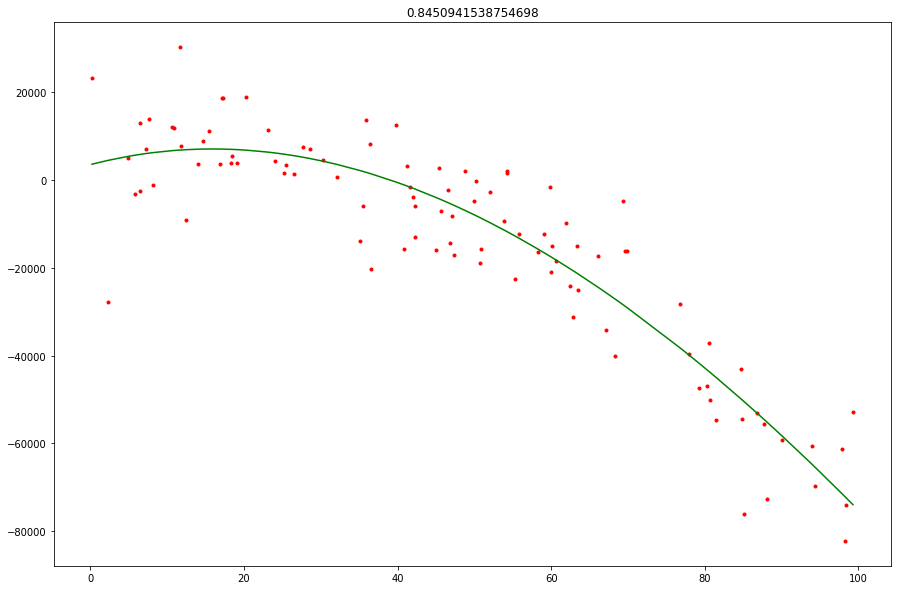

In [187]:
plt.figure(figsize=(15, 10))
plt.plot(x, y, 'r.')
plt.plot(x, test.y_hat(x), 'g-')
plt.title(metrics.r2_score(y, test.y_hat(x)))